In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
import seaborn as sns

import plotly.express as px

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.sparse import csr_matrix


import warnings

# Hide warnings
warnings.filterwarnings("ignore")


In [3]:
recom1 = pd.read_csv('recommendationDictDraw1.csv')

In [4]:
recom1.head()

,Unnamed: 0,Unnamed: 1,movie,movie_score
0,769,157,645,1.604588
1,769,151,624,1.604588
2,769,112,459,1.604588
3,769,204,825,1.237254
4,769,55,270,1.224019


In [5]:
#load in genres dataframe
df_genres = pd.read_csv('netflix_genres.csv')
df_genres

df_withMovieiD = pd.read_csv('allmovies_cleaned.csv')
df_withMovieiD.rename(columns={'Unnamed: 0': 'rows'}, inplace=True)
df_withMovieiD.rename(columns={'movie': 'movieId'}, inplace=True)

df_withMovieiD = df_withMovieiD.drop(columns=['rows'])
df_withMovieiD



def get_genre_ratings(ratings, movies, genres, column_names):
  genre_ratings = pd.DataFrame()
  for genre in genres:
    genre_movies = movies[movies['genres'].str.contains(genre)]
    avg_genre_votes_per_user = ratings[ratings['movieId'].isin(
      genre_movies['movieId'])].loc[:, ['user', 'rating']].groupby(
        ['user'])['rating'].mean().round(2)

    genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user],
                              axis=1)

  genre_ratings.columns = column_names
  return genre_ratings






In [6]:
genres = pd.read_csv('netflix_genres.csv')
genres

,movieId,genres
0,1,Documentary|Animation|Family
1,3,Crime|Drama|Mystery
2,4,Family
3,5,Documentary|Sport
4,6,Documentary
...,...,...
12274,17764,Comedy|Drama|History|Romance
12275,17765,Action|Adventure|Family|Sci-Fi
12276,17768,Action|Drama|Fantasy
12277,17769,Drama|Music|Romance


In [7]:
genres['genres'] = genres['genres'].str.split('|').tolist()

explodedDf = genres.explode('genres')
allGenres = explodedDf['genres'].unique().tolist()
print(allGenres)

columns = allGenres

['Documentary', 'Animation', 'Family', 'Crime', 'Drama', 'Mystery', 'Sport', 'Action', 'Sci-Fi', 'Comedy', 'Fantasy', 'Horror', 'Film-Noir', 'Romance', 'Thriller', 'Music', 'Biography', 'Musical', 'Talk-Show', 'Adventure', 'War', 'History', 'Short', 'Western', 'Game-Show', 'Reality-TV', 'News']


In [8]:
# Calculate the average rating of romance and scifi movies
genre_ratings = get_genre_ratings(df_withMovieiD, df_genres,
                                  allGenres,
                                  columns)
genre_ratings


,Documentary,Animation,Family,Crime,Drama,Mystery,Sport,Action,Sci-Fi,Comedy,...,Musical,Talk-Show,Adventure,War,History,Short,Western,Game-Show,Reality-TV,News
6,3.0,NaN,3.00,3.62,3.31,3.00,3.0,3.40,3.25,3.17,...,NaN,NaN,3.57,3.5,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,3.33,3.33,4.33,4.43,4.67,3.0,4.23,4.20,3.80,...,4.0,4.0,3.82,3.0,4.0,NaN,3.0,NaN,NaN,NaN
42,5.0,5.00,NaN,3.50,3.67,4.00,NaN,3.50,3.50,4.00,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
59,5.0,NaN,NaN,4.00,3.62,NaN,NaN,4.75,5.00,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2.0,2.00,2.00,2.00,4.75,NaN,NaN,2.00,NaN,2.33,...,2.0,NaN,4.00,2.0,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
1193669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
1639591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1899475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [9]:
#genre_ratings.to_csv('./genre_ratings.csv')

In [10]:
genre_ratingsCopy = genre_ratings

# now cluster this copy. 

In [39]:
X = genre_ratingsCopy
print('Total Users: {} \nTotal Categories: {}'.format(X.shape[0],X.shape[1]))
total_nan_count = X.isna().sum().sum()
total_non_nan_count = X.count().sum()
print('Total NaN: {} \nTotal non-Nan: {}'.format(total_nan_count,total_non_nan_count))
print('Ratio: {}'.format(total_nan_count/total_non_nan_count))

#X = X.values
X

Total Users: 420830 
Total Categories: 27
Total NaN: 7231215 
Total non-Nan: 4131195
Ratio: 1.7503930460798873


,Documentary,Animation,Family,Crime,Drama,Mystery,Sport,Action,Sci-Fi,Comedy,...,Musical,Talk-Show,Adventure,War,History,Short,Western,Game-Show,Reality-TV,News
6,3.0,NaN,3.00,3.62,3.31,3.00,3.0,3.40,3.25,3.17,...,NaN,NaN,3.57,3.5,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,3.33,3.33,4.33,4.43,4.67,3.0,4.23,4.20,3.80,...,4.0,4.0,3.82,3.0,4.0,NaN,3.0,NaN,NaN,NaN
42,5.0,5.00,NaN,3.50,3.67,4.00,NaN,3.50,3.50,4.00,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
59,5.0,NaN,NaN,4.00,3.62,NaN,NaN,4.75,5.00,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2.0,2.00,2.00,2.00,4.75,NaN,NaN,2.00,NaN,2.33,...,2.0,NaN,4.00,2.0,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
1193669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
1639591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1899475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [40]:
# convert NaN to rowAverage
X = X.fillna(X.where(X.notna(), X.mean(axis=1), axis=0))

X

,Documentary,Animation,Family,Crime,Drama,Mystery,Sport,Action,Sci-Fi,Comedy,...,Musical,Talk-Show,Adventure,War,History,Short,Western,Game-Show,Reality-TV,News
6,3.0,3.470,3.000000,3.62,3.31,3.000000,3.000000,3.40,3.250000,3.17,...,3.470000,3.470000,3.570000,3.500000,3.470,3.470000,3.470000,3.470000,3.470000,3.470000
7,5.0,3.330,3.330000,4.33,4.43,4.670000,3.000000,4.23,4.200000,3.80,...,4.000000,4.000000,3.820000,3.000000,4.000,3.942857,3.000000,3.942857,3.942857,3.942857
42,5.0,5.000,4.060909,3.50,3.67,4.000000,4.060909,3.50,3.500000,4.00,...,4.060909,4.060909,4.060909,4.060909,5.000,4.060909,4.060909,4.060909,4.060909,4.060909
59,5.0,4.212,4.212000,4.00,3.62,4.212000,4.212000,4.75,5.000000,3.00,...,4.212000,4.212000,4.212000,4.212000,4.212,4.212000,4.212000,4.212000,4.212000,4.212000
94,2.0,2.000,2.000000,2.00,4.75,2.405333,2.405333,2.00,2.405333,2.33,...,2.000000,2.405333,4.000000,2.000000,2.000,2.405333,2.405333,2.405333,2.405333,2.405333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084826,3.0,3.000,3.000000,3.00,3.00,3.000000,3.000000,3.00,3.000000,3.00,...,3.000000,3.000000,3.000000,3.000000,3.000,3.000000,3.000000,3.000000,3.000000,3.000000
1193669,3.0,3.000,3.000000,3.00,3.00,3.000000,3.000000,3.00,3.000000,3.00,...,3.000000,3.000000,3.000000,3.000000,3.000,3.000000,3.000000,3.000000,3.000000,3.000000
1639591,1.0,1.000,1.000000,1.00,1.00,1.000000,1.000000,1.00,1.000000,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
1899475,4.0,4.000,4.000000,4.00,4.00,4.000000,4.000000,4.00,4.000000,4.00,...,4.000000,4.000000,4.000000,4.000000,4.000,4.000000,4.000000,4.000000,4.000000,4.000000


In [41]:
X = X.values

print(len(X))
X

420830


array([[3.        , 3.47      , 3.        , ..., 3.47      , 3.47      ,
        3.47      ],
       [5.        , 3.33      , 3.33      , ..., 3.94285714, 3.94285714,
        3.94285714],
       [5.        , 5.        , 4.06090909, ..., 4.06090909, 4.06090909,
        4.06090909],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [4.        , 4.        , 4.        , ..., 4.        , 4.        ,
        4.        ],
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ]])

In [14]:
# Elbow Bend Test
wcss = []
max_clusters = 17

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


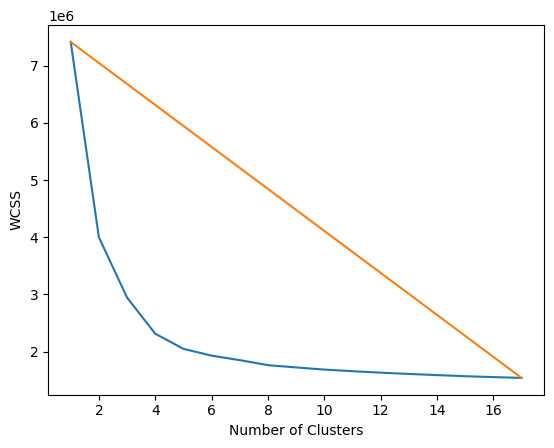

In [15]:

# Plot the elbow curve
plt.plot(range(1, max_clusters+1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

x = [1, max_clusters]
y = [wcss[0],wcss[len(wcss)-1]]
plt.plot(x,y)
plt.show()


import warnings

# Hide warnings
warnings.filterwarnings("ignore")

optimizedClusters = 4

In [16]:
# Elbow bend test confirms optimal number of clusters to be 4

kmeans = KMeans(n_clusters=optimizedClusters, random_state=0, n_init="auto").fit(X)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_
clusters


array([[3.90451931, 3.93221703, 3.93018491, 3.84973821, 3.94899396,
        3.88901737, 3.95009032, 3.85849931, 3.85737423, 3.7563239 ,
        3.87766713, 3.808096  , 3.90101124, 3.77730073, 3.87320795,
        4.03017043, 4.03763935, 3.9228149 , 3.91559619, 3.881876  ,
        3.92538193, 3.94584417, 3.89343697, 3.91343214, 3.89887048,
        3.89887048, 3.89916056],
       [1.96950877, 1.94291031, 1.952926  , 1.96070526, 2.1750967 ,
        1.94087167, 1.9868645 , 1.92521083, 1.9260711 , 1.97909412,
        1.91207167, 1.9362349 , 1.97073451, 1.98206973, 1.95050825,
        1.98507472, 2.0419416 , 1.94259344, 1.98556887, 1.96364548,
        1.97826405, 1.97565011, 1.96698883, 1.95809938, 1.96976245,
        1.96976245, 1.97108576],
       [3.17741568, 3.17184585, 3.16637433, 3.15855186, 3.33253969,
        3.1545989 , 3.23145994, 3.13530703, 3.09580384, 3.0946532 ,
        3.0941917 , 3.05558887, 3.18664739, 3.12908794, 3.18086498,
        3.29978743, 3.36597726, 3.16846745, 3.2051

In [42]:
print(X[:, 0])
print(len(X[0]))
print(len(labels))

print(len(allGenres))

[3. 5. 5. ... 1. 4. 5.]
27
420830
27


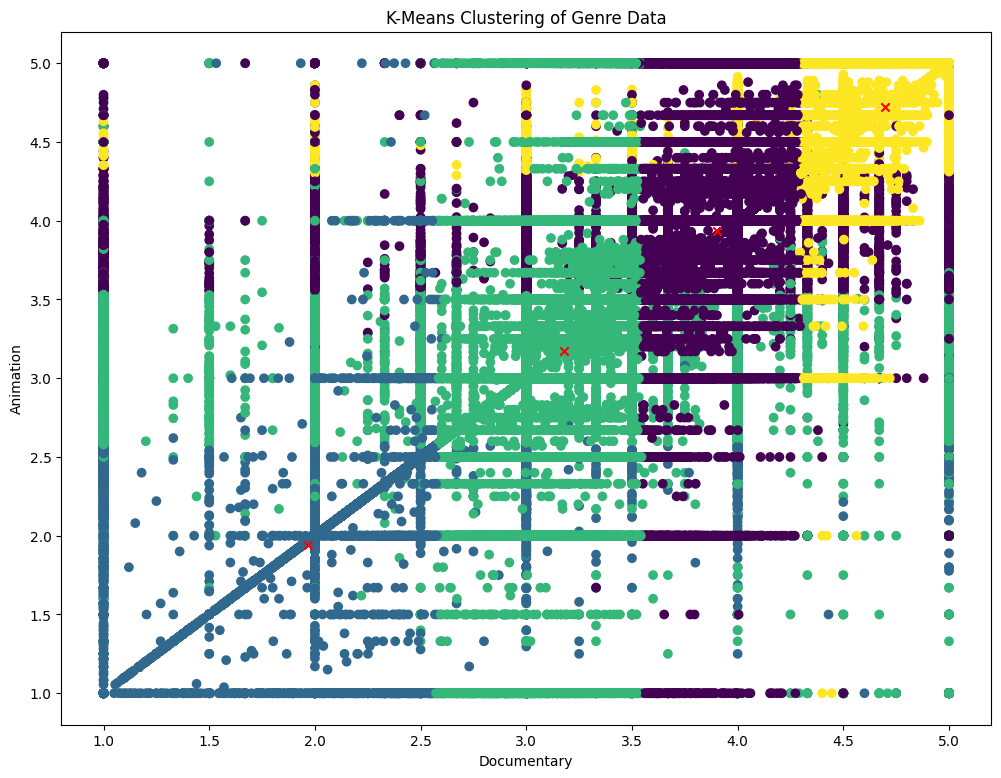

In [18]:
# Plotting the clusters
plt.figure(figsize=(12, 9))

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(clusters[:, 0], clusters[:, 1], marker='x', color='red')
plt.xlabel('Documentary')
plt.ylabel('Animation')
plt.title('K-Means Clustering of Genre Data')
plt.show()

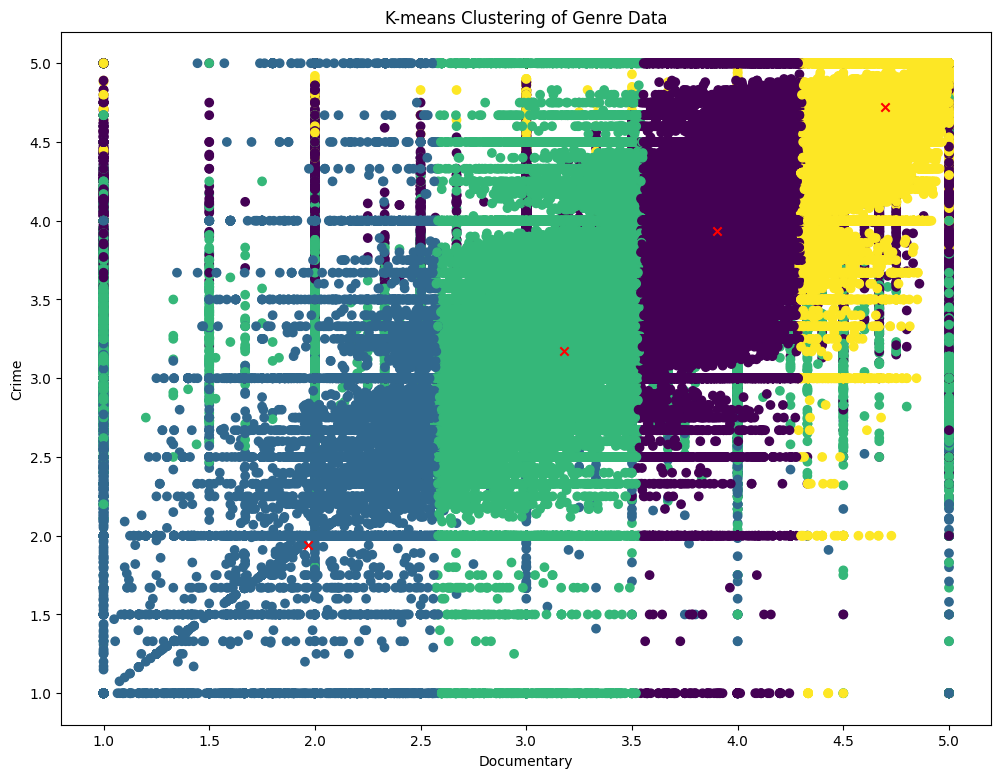

In [19]:
# Plotting the clusters
plt.figure(figsize=(12, 9))

plt.scatter(X[:, 0], X[:, 4], c=labels)
plt.scatter(clusters[:, 0], clusters[:, 1], marker='x', color='red')
plt.xlabel('Documentary')
plt.ylabel('Crime')
plt.title('K-means Clustering of Genre Data')
plt.show()

# show distribution of users in each of these sections
# check email for link

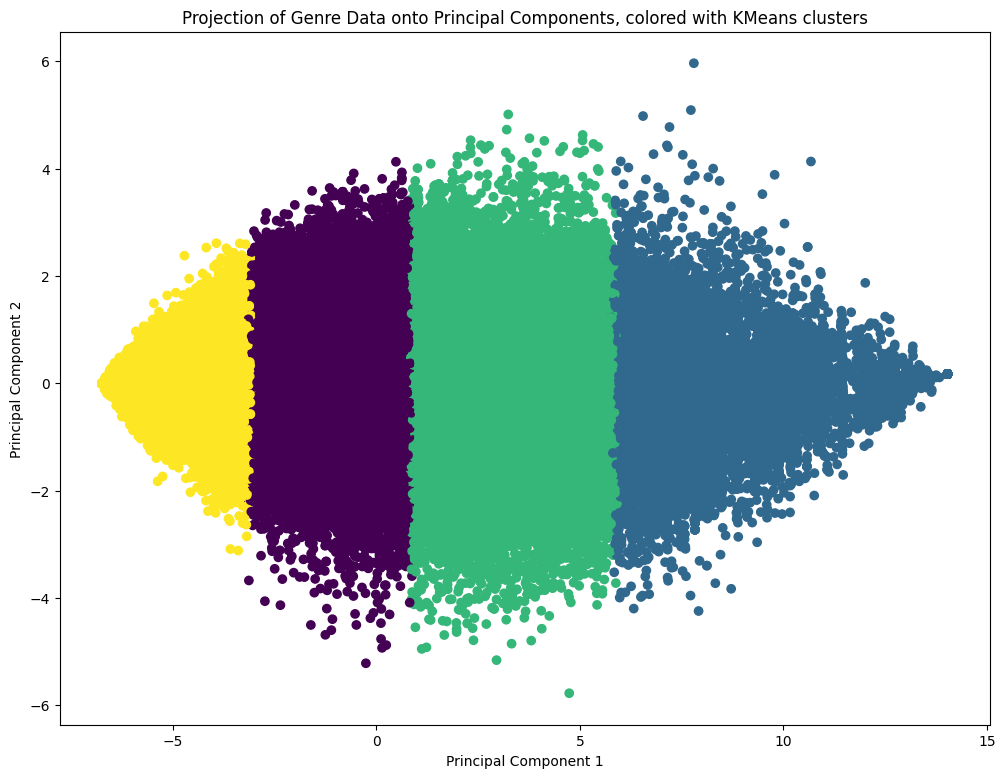

In [24]:
plt.figure(figsize=(12, 9))

# Apply PCA
pca = PCA(n_components=optimizedClusters)
pca_data = pca.fit_transform(X)

loadings = pca.components_

#pca_data now has projected data in reduced dimensions
#  Each row in pca_data corresponds to a data point in X, where the columns represent the different principal components in descending order of explained variance.
# colored with kmeans labels 

plt.scatter(pca_data[:,0], pca_data[:,1], c=labels) #all rows, first column, colored with kmeans clusters
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of Genre Data onto Principal Components, colored with KMeans clusters')
plt.show()

In [21]:
X

array([[3.        , 3.47      , 3.        , ..., 3.47      , 3.47      ,
        3.47      ],
       [5.        , 3.33      , 3.33      , ..., 3.94285714, 3.94285714,
        3.94285714],
       [5.        , 5.        , 4.06090909, ..., 4.06090909, 4.06090909,
        4.06090909],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [4.        , 4.        , 4.        , ..., 4.        , 4.        ,
        4.        ],
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ]])

In [22]:
# Analyze the loadings
for i, pc in enumerate(range(1, optimizedClusters+1)):  # Assuming optimizedClusters principal components
    print(f"Principal Component {pc}:")
    for j, feature in enumerate(range(X.shape[1])):  # Assuming X has shape (n_samples, n_features)
        loading = loadings[i, j]
        print(f"- {allGenres[j]}: {loading:.4f}")
    print()

Principal Component 1:
- Documentary: -0.1931
- Animation: -0.1970
- Family: -0.1973
- Crime: -0.1917
- Drama: -0.1747
- Mystery: -0.1955
- Sport: -0.1921
- Action: -0.1963
- Sci-Fi: -0.1984
- Comedy: -0.1862
- Fantasy: -0.2013
- Horror: -0.1976
- Film-Noir: -0.1922
- Romance: -0.1859
- Thriller: -0.1921
- Music: -0.1919
- Biography: -0.1848
- Musical: -0.1965
- Talk-Show: -0.1909
- Adventure: -0.1927
- War: -0.1904
- History: -0.1912
- Short: -0.1930
- Western: -0.1943
- Game-Show: -0.1925
- Reality-TV: -0.1925
- News: -0.1924

Principal Component 2:
- Documentary: -0.0302
- Animation: -0.0587
- Family: -0.1585
- Crime: 0.4263
- Drama: -0.0735
- Mystery: 0.2011
- Sport: -0.0671
- Action: 0.3903
- Sci-Fi: 0.1253
- Comedy: -0.2784
- Fantasy: -0.0229
- Horror: 0.0416
- Film-Noir: 0.0007
- Romance: -0.3980
- Thriller: 0.4440
- Music: -0.2694
- Biography: -0.2213
- Musical: -0.0928
- Talk-Show: -0.0087
- Adventure: 0.0618
- War: -0.0116
- History: -0.0285
- Short: -0.0022
- Western: -0.008

In [23]:
pca_data
print(len(pca_data))
print(len(pca_data[1]))

420830
4


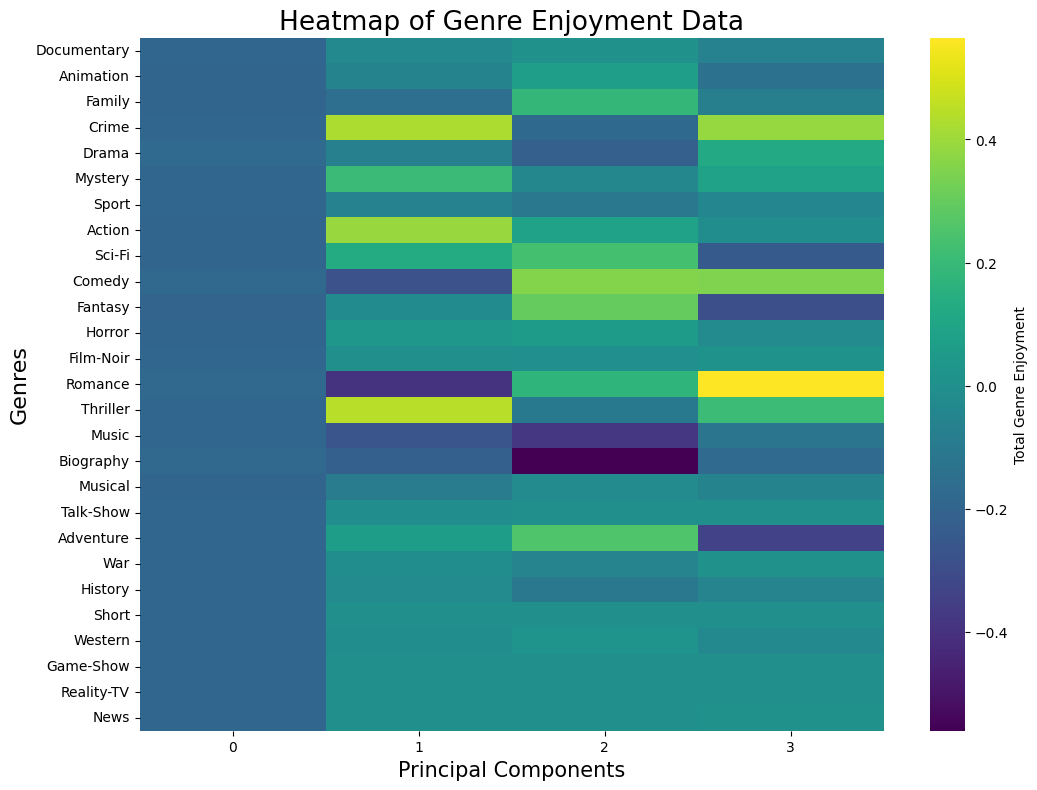

In [44]:
# Make heatmap of this heere
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(loadings.T, cmap="viridis", cbar_kws={'label': 'Total Genre Enjoyment'})
heatmap.set_yticklabels(allGenres, rotation=0)

plt.ylabel("Genres", fontsize=16)
plt.xlabel("Principal Components", fontsize=15)
plt.title("Heatmap of Genre Enjoyment Data", fontsize=19)
#plt.xticks(rotation=90)
plt.show()

Make network graph of this information here. One graph for each cluster use the networkRX graph

AND next, go back and document steps you implemented here
then 

Now, I can cluster this using 
K-means Clustering:

Ijust found out that this last part was useless. 
BUT network graph will look cool

In [26]:
kmeans = KMeans(n_clusters=optimizedClusters, random_state=0, n_init="auto").fit(loadings.T)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_
cluster_labels = kmeans.fit_predict(loadings.T)
clusters
loadings.T

array([[-1.93082648e-01, -3.03237872e-02,  4.45878332e-03,
        -6.50757892e-02],
       [-1.97048402e-01, -5.83706139e-02,  6.71761539e-02,
        -1.38202832e-01],
       [-1.97276031e-01, -1.58477714e-01,  1.85869489e-01,
        -8.10108993e-02],
       [-1.91669276e-01,  4.26325563e-01, -1.82422159e-01,
         3.87790023e-01],
       [-1.74715982e-01, -7.35268274e-02, -2.21472008e-01,
         1.18013079e-01],
       [-1.95467348e-01,  2.01019480e-01, -3.84702169e-02,
         8.64206599e-02],
       [-1.92065187e-01, -6.72391017e-02, -1.09261395e-01,
        -4.53734878e-02],
       [-1.96257326e-01,  3.90378425e-01,  9.04481841e-02,
        -6.66075451e-03],
       [-1.98380915e-01,  1.25399654e-01,  2.29680131e-01,
        -2.47315876e-01],
       [-1.86213092e-01, -2.78406732e-01,  3.56582694e-01,
         3.48078743e-01],
       [-2.01335998e-01, -2.28999794e-02,  2.98344713e-01,
        -2.87940320e-01],
       [-1.97592859e-01,  4.14574386e-02,  5.97024418e-02,
      

In [27]:
len(loadings.T[:,0])
# first principal component of all genres
# second principal component of all genres

27

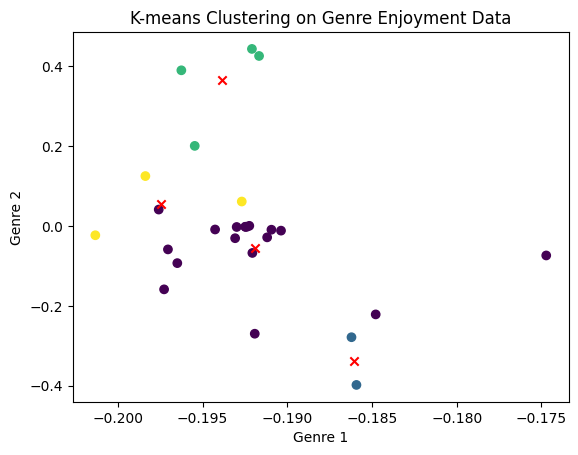

In [28]:
plt.scatter(loadings.T[:, 0], loadings.T[:, 1], c=cluster_labels)
plt.scatter(clusters[:, 0], clusters[:, 1], marker='x', color='red')
plt.xlabel('Genre 1')
plt.ylabel('Genre 2')
plt.title('K-means Clustering on Genre Enjoyment Data')
plt.show()

In [29]:
# try making principal components equal to genres length so it is a square matrix
# then try pearson correlation for that or cosine similarity
allGenres

['Documentary',
 'Animation',
 'Family',
 'Crime',
 'Drama',
 'Mystery',
 'Sport',
 'Action',
 'Sci-Fi',
 'Comedy',
 'Fantasy',
 'Horror',
 'Film-Noir',
 'Romance',
 'Thriller',
 'Music',
 'Biography',
 'Musical',
 'Talk-Show',
 'Adventure',
 'War',
 'History',
 'Short',
 'Western',
 'Game-Show',
 'Reality-TV',
 'News']

In [77]:
coordDF = pd.DataFrame(loadings.T)
coordDF = coordDF.rename(index=dict(enumerate(allGenres)))

#coordDF = coordDF.columns['Group 1', 'Group 2', 'Group 3', 'Group 4']
coordDF

,0,1,2,3
Documentary,-0.193083,-0.030342,0.004593,-0.064316
Animation,-0.197048,-0.058498,0.067961,-0.138250
Family,-0.197276,-0.158553,0.186141,-0.080611
Crime,-0.191669,0.426466,-0.181434,0.388237
Drama,-0.174716,-0.073469,-0.222778,0.116839
Mystery,-0.195467,0.200989,-0.038542,0.087150
Sport,-0.192065,-0.067103,-0.110930,-0.045873
Action,-0.196257,0.390092,0.089468,-0.007111
Sci-Fi,-0.198381,0.125356,0.230203,-0.247750
Comedy,-0.186213,-0.278372,0.356929,0.348959


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Documentary'),
  Text(1, 0, 'Animation'),
  Text(2, 0, 'Family'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Drama'),
  Text(5, 0, 'Mystery'),
  Text(6, 0, 'Sport'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Sci-Fi'),
  Text(9, 0, 'Comedy'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Film-Noir'),
  Text(13, 0, 'Romance'),
  Text(14, 0, 'Thriller'),
  Text(15, 0, 'Music'),
  Text(16, 0, 'Biography'),
  Text(17, 0, 'Musical'),
  Text(18, 0, 'Talk-Show'),
  Text(19, 0, 'Adventure'),
  Text(20, 0, 'War'),
  Text(21, 0, 'History'),
  Text(22, 0, 'Short'),
  Text(23, 0, 'Western'),
  Text(24, 0, 'Game-Show'),
  Text(25, 0, 'Reality-TV'),
  Text(26, 0, 'News')])

<Figure size 1000x2000 with 0 Axes>

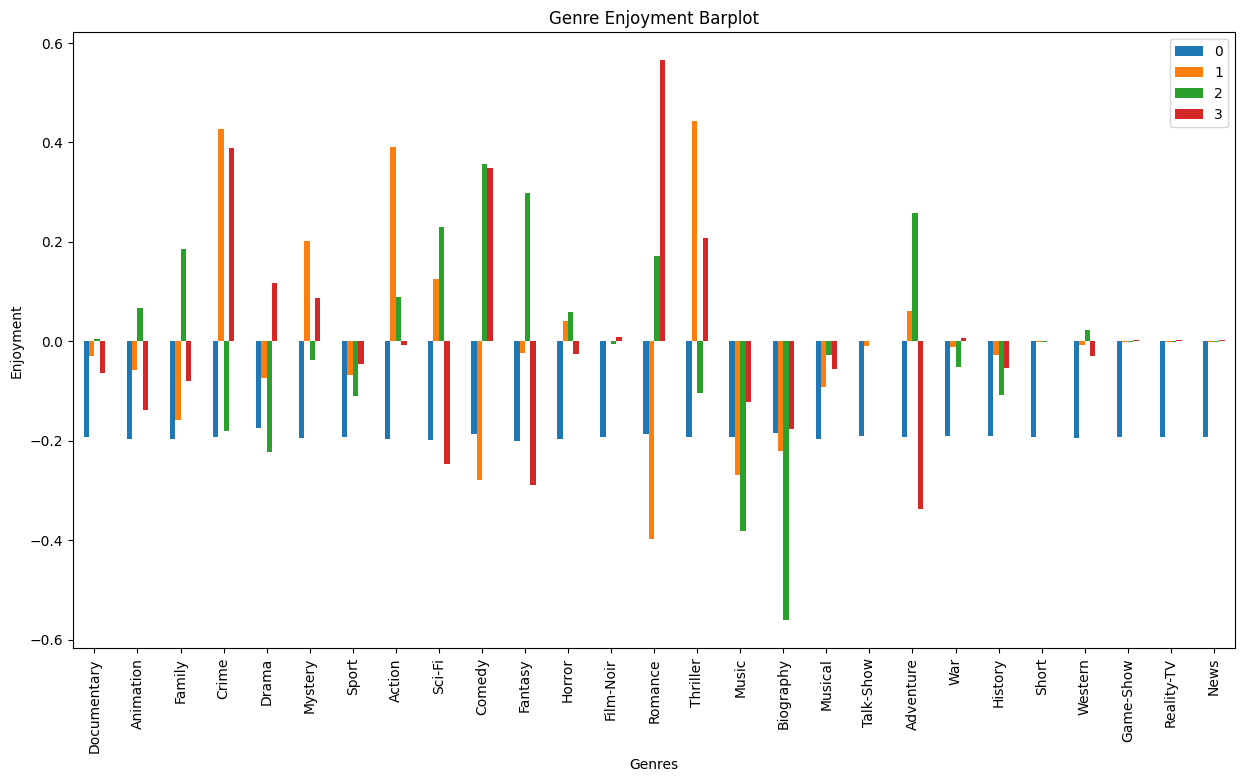

In [78]:
plt.figure(figsize=(10, 20))  # Adjust the dimensions as needed

coordDF.plot(kind='bar', figsize=(15,8))

plt.xlabel('Genres')
plt.ylabel('Enjoyment')
plt.title('Genre Enjoyment Barplot')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

In [83]:
new_row = coordDF.iloc[0].copy()
adjustedDF = coordDF
adjustedDF.loc[len(coordDF)] = new_row


In [87]:
#values
#angles

len(genres)

12279

In [85]:
# Number of genres and the angle of each axis in the plot
num_genres = len(allGenres)
angles = np.linspace(0, 2 * np.pi, num_genres, endpoint=False).tolist()

angles += angles[:1]  # Repeat the first angle to close the plot

ratings = coordDF.values

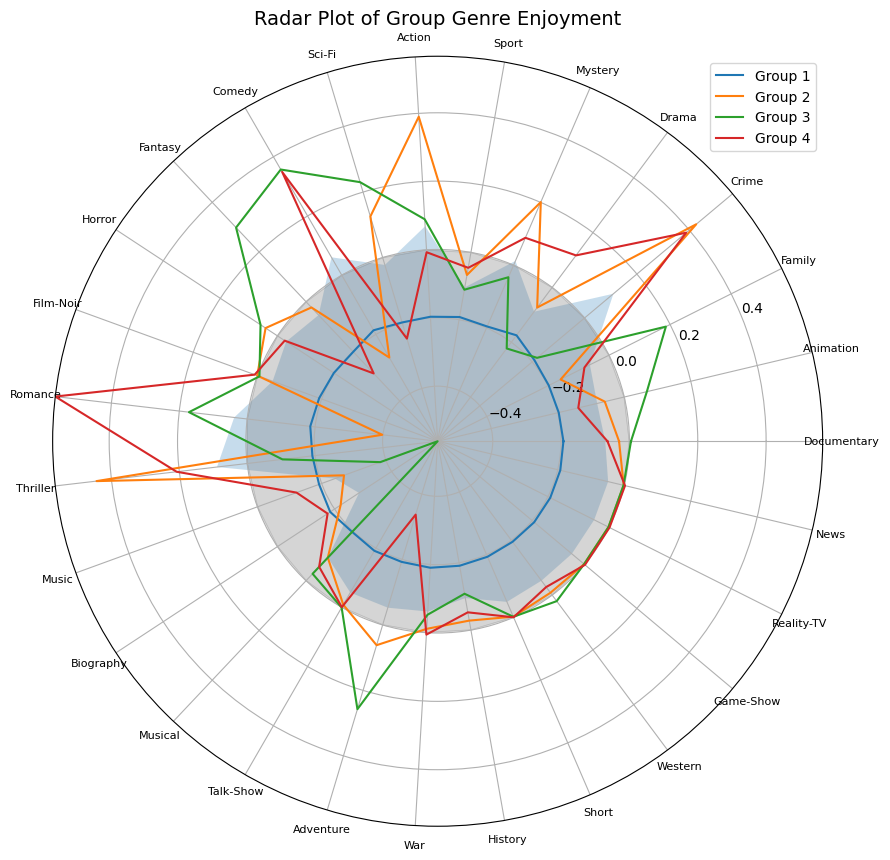

In [89]:

# Create the radar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})

# Plot the principal components as radar lines
for i in range(ratings.shape[1]):
    ax.plot(angles, adjustedDF.values[:,i], label='Group {}'.format(i+1))

# Fill the area under the radar lines
ax.fill(angles, coordDF.mean(axis=1).tolist(), alpha=0.25)
ax.fill(angles, [0 for i in angles], color = "#757575", alpha = 0.3)

# Set the title and legend
ax.set_title('Radar Plot of Group Genre Enjoyment', fontsize=14)
ax.legend(loc='upper right')

# Set the tick labels and position
ax.set_xticks(angles[:-1])
ax.set_xticklabels(allGenres, fontsize=8)

# Set the y-axis limits
ax.set_ylim([adjustedDF.values.min(), adjustedDF.values.max()])

# Display the plot
plt.show()


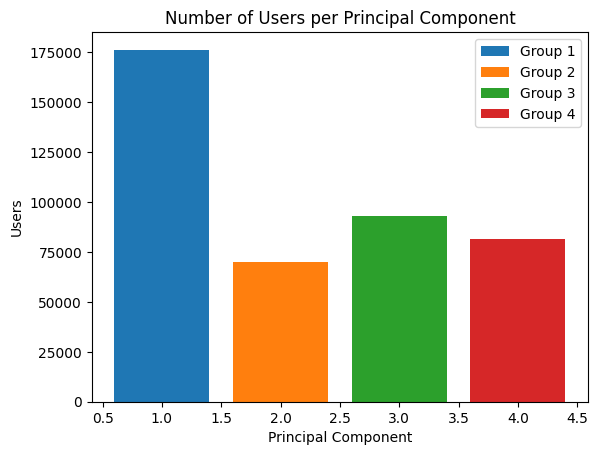

In [36]:
counts = np.bincount(np.argmax(pca_data, axis=1))


for i in range(0,len(counts)):
    plt.bar(i+1, counts[i], label="Group {}".format(i+1))
    
plt.xlabel('Principal Component')
plt.ylabel('Users')
plt.title('Number of Users per Principal Component')
plt.legend()
plt.show()